In [454]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [455]:
#load the data
data = pd.read_csv("D:\projects\predictive\equipment_data.csv")
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\afree\AppData\Local\Temp\ipykernel_20192\2942608465.py:2: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("D:\projects\predictive\equipment_data.csv")


,Timestamp,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
0,2019-01-01 00:00:00,0.5488,0.5098,0.6199,0.7412,1,0.5011,0.4996
1,2019-01-01 01:00:00,0.7152,0.5876,0.8021,0.2929,1,0.5849,0.5386
2,2019-01-01 02:00:00,0.6027,0.2945,0.9655,0.6244,1,0.4445,0.3525
3,2019-01-01 03:00:00,0.5449,0.5000,0.5200,0.9320,0,0.4720,0.6028
4,2019-01-01 04:00:00,0.4236,0.0316,0.3237,0.7999,0,0.4401,0.2646


In [456]:
#explore the data 
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


In [457]:
#check for null values
data.isnull().sum()

Timestamp               0
Temperature (°C)        0
Vibration (mm/s)        0
Pressure (Pa)           0
RPM                     0
Maintenance Required    0
Temp_Change             0
Vib_Change              0
dtype: int64

In [458]:
#feature engineering
data['Timestamp']=pd.to_datetime(data['Timestamp'])

data['year']=data['Timestamp'].dt.year
data['month']=data['Timestamp'].dt.month
data['day']=data['Timestamp'].dt.day

data['hour']=data['Timestamp'].dt.hour
data['min']=data['Timestamp'].dt.minute
data['sec']=data['Timestamp'].dt.second

data = data.drop(data.columns[[0]], axis=1)

print(data.info())
print("#"*25)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (°C)      43800 non-null  float64
 1   Vibration (mm/s)      43800 non-null  float64
 2   Pressure (Pa)         43800 non-null  float64
 3   RPM                   43800 non-null  float64
 4   Maintenance Required  43800 non-null  int64  
 5   Temp_Change           43800 non-null  float64
 6   Vib_Change            43800 non-null  float64
 7   year                  43800 non-null  int32  
 8   month                 43800 non-null  int32  
 9   day                   43800 non-null  int32  
 10  hour                  43800 non-null  int32  
 11  min                   43800 non-null  int32  
 12  sec                   43800 non-null  int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 3.3 MB
None
#########################


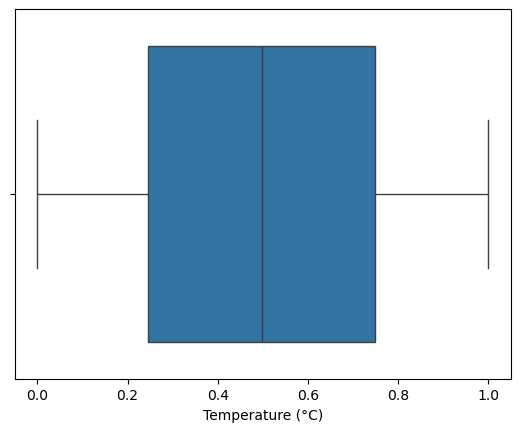

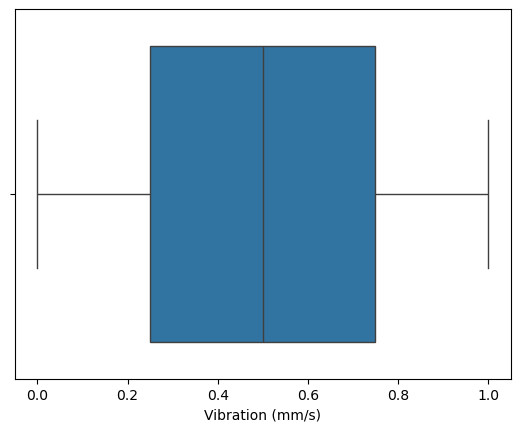

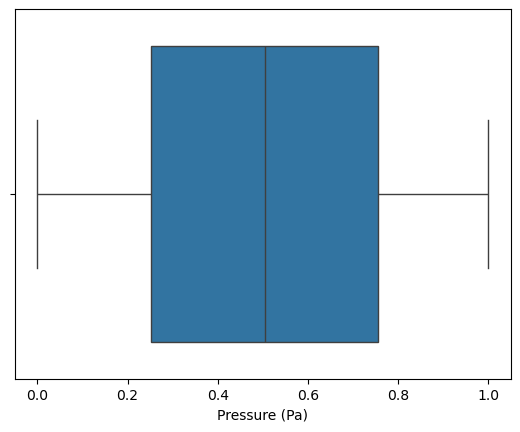

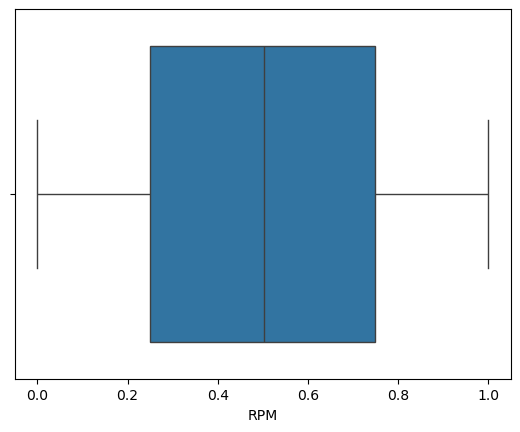

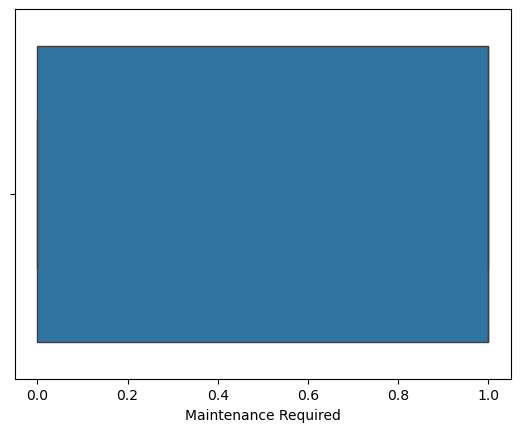

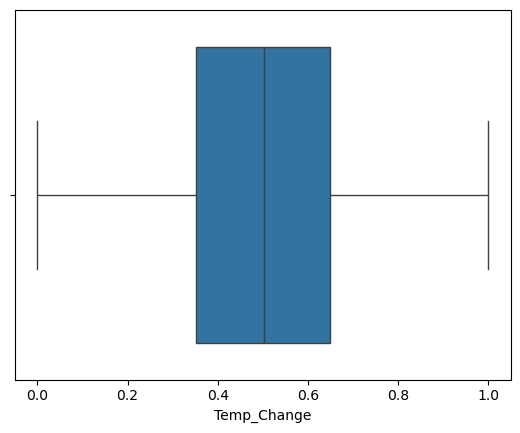

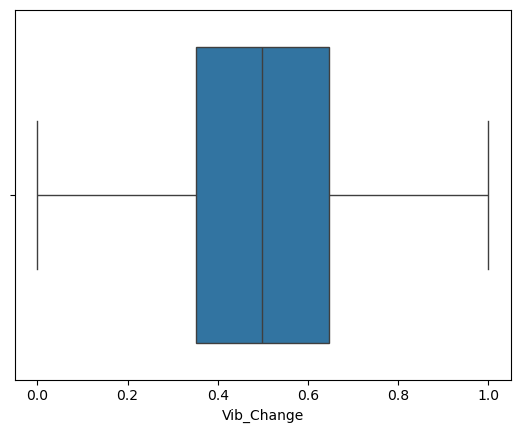

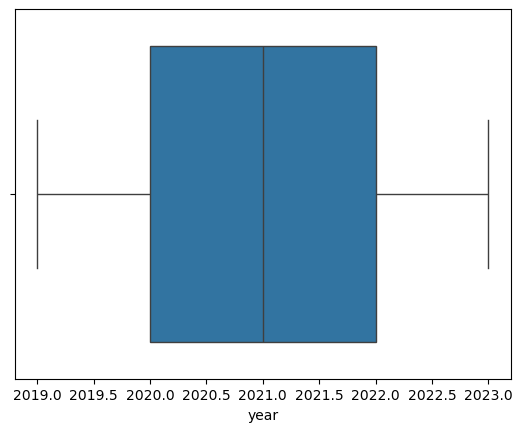

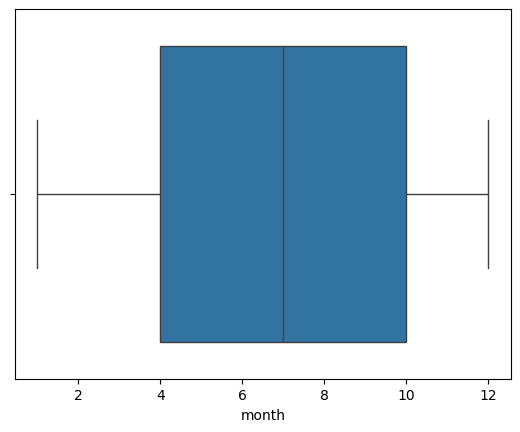

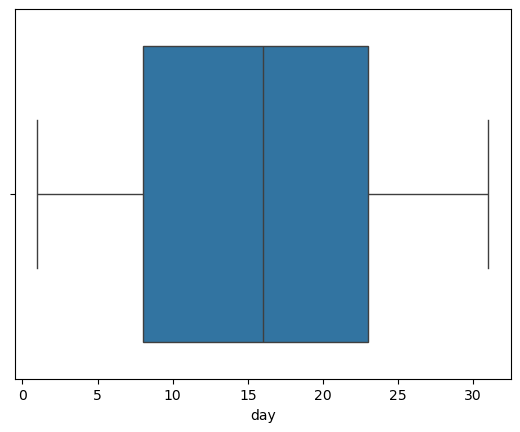

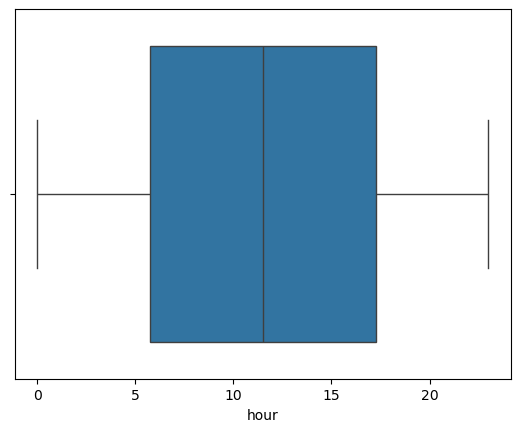

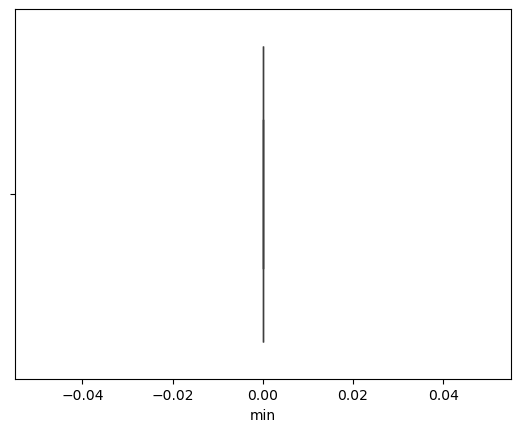

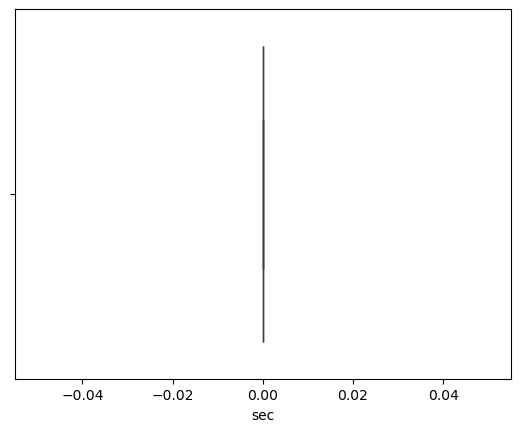

In [459]:
#boxplot to identify outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [462]:
y = data[['Maintenance Required']]
y

,Maintenance Required
0,1
1,1
2,1
3,0
4,0
...,...
43795,0
43796,1
43797,0
43798,0


In [463]:
X = data.drop('Maintenance Required', axis=1)
X

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
0,0.5488,0.5098,0.6199,0.7412,0.5011,0.4996,2019,1,1,0,0,0
1,0.7152,0.5876,0.8021,0.2929,0.5849,0.5386,2019,1,1,1,0,0
2,0.6027,0.2945,0.9655,0.6244,0.4445,0.3525,2019,1,1,2,0,0
3,0.5449,0.5000,0.5200,0.9320,0.4720,0.6028,2019,1,1,3,0,0
4,0.4236,0.0316,0.3237,0.7999,0.4401,0.2646,2019,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.7195,0.2518,0.4034,0.8686,0.4799,0.5251,2023,12,30,19,0,0
43796,0.8835,0.6335,0.6693,0.7025,0.5837,0.6912,2023,12,30,20,0,0
43797,0.5163,0.3387,0.2063,0.9893,0.3163,0.3517,2023,12,30,21,0,0
43798,0.8611,0.1420,0.3683,0.0454,0.6747,0.4009,2023,12,30,22,0,0


In [466]:
#data splitting as train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [467]:
X_train

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
25563,0.6977,0.9046,0.9986,0.9306,0.6133,0.6348,2021,12,1,3,0,0
38398,0.6485,0.2334,0.8293,0.1734,0.8201,0.2077,2023,5,19,22,0,0
14428,0.6601,0.1111,0.6765,0.3976,0.4914,0.2187,2020,8,24,4,0,0
40742,0.8674,0.9580,0.9400,0.0761,0.8835,0.8178,2023,8,25,14,0,0
39049,0.9134,0.3099,0.7533,0.1481,0.4956,0.6483,2023,6,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.7496,0.4720,0.1613,0.9920,0.5705,0.5480,2020,4,25,12,0,0
27640,0.1189,0.3119,0.2149,0.7932,0.3484,0.2450,2022,2,25,16,0,0
14501,0.3330,0.6302,0.9198,0.2708,0.4387,0.7631,2020,8,27,5,0,0
30727,0.7456,0.7242,0.3910,0.1995,0.6926,0.3671,2022,7,4,7,0,0


In [468]:
X_test

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
19019,0.8721,0.3245,0.4472,0.9840,0.4394,0.6547,2021,3,3,11,0,0
2787,0.6491,0.4058,0.1442,0.3202,0.7585,0.4617,2019,4,27,3,0,0
4211,0.9625,0.2190,0.1084,0.5684,0.5843,0.3325,2019,6,25,11,0,0
41075,0.0874,0.0819,0.2998,0.0374,0.0601,0.2765,2023,9,8,11,0,0
24976,0.7384,0.9809,0.9001,0.0147,0.6299,0.7201,2021,11,6,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34587,0.4641,0.2717,0.0107,0.2241,0.2874,0.4326,2022,12,12,3,0,0
31170,0.5548,0.3299,0.5055,0.9760,0.2886,0.6128,2022,7,22,18,0,0
9863,0.8430,0.4432,0.0224,0.1788,0.8516,0.5970,2020,2,15,23,0,0
36387,0.4437,0.2590,0.2085,0.6051,0.5275,0.2183,2023,2,25,3,0,0


In [469]:
y_train

,Maintenance Required
25563,1
38398,0
14428,0
40742,1
39049,1
...,...
11532,0
27640,1
14501,0
30727,1


In [470]:
y_test

,Maintenance Required
19019,1
2787,1
4211,0
41075,1
24976,1
...,...
34587,0
31170,1
9863,0
36387,1


In [483]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100,random_state=40,min_samples_split=20,max_features=8,max_depth=9)
model.fit(X_train, y_train)

C:\Users\afree\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, max_features=8, min_samples_split=20,
                       random_state=40)

In [485]:
y_test_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.5090182648401826
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      4390
           1       0.51      0.55      0.53      4370

    accuracy                           0.51      8760
   macro avg       0.51      0.51      0.51      8760
weighted avg       0.51      0.51      0.51      8760



In [ ]:
#hyperparameter tuning
rf_params = {"max_depth" : [5, 8, 15, None, 10],
             "max_features" : [5, 7, "auto", 8],
             "min_samples_split" : [2, 8, 15, 20],
             "n_estimators" : [100, 200, 500, 1000]}

In [487]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [489]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [491]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    model.fit(X_train, y_train)
    #model_param[name] = random.best_params_
    best_ = RandomizedSearchCV(model, params, refit=True, n_jobs=-1).fit(X_train, y_train).best_params_

for model_name in best_:
    print(f"-------------------Best Params for {model_name}------------------------")
    print(best_[model_name])